# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

- Saya memilih dataset melalui public repositori Kaggle yang berjudul "Game Recommendations on Steam" oleh Anton Kozyriev. Dataset ini memiliki 3 entities, diantaranya games.csv, users.csv, recommendations.csv. Pada kesempatan ini saya hanya menggunakan games.csv yang by record memiliki 50.000 baris. Hal ini tentunya sangat banyak jika semua baris data digunakan, kedepannya saya hanya akan mengambil 5000 baris data untuk submission machine learning ini.
- Terdapat 10 kolom Fitur, dengan campuran tipe data Kategorikal dan Numerikal.

Sumber : https://www.kaggle.com/datasets/antonkozyriev/game-recommendations-on-steam

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [366]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [367]:
df = pd.read_csv("data/netflix.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [368]:
df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [370]:
df.describe()

,index,release_year,runtime,imdb_score,imdb_votes
count,5283.000000,5283.000000,5283.000000,5283.000000,5.267000e+03
mean,2641.000000,2015.879992,79.199886,6.533447,2.340719e+04
std,1525.215067,7.346098,38.915974,1.160932,8.713432e+04
min,0.000000,1953.000000,0.000000,1.500000,5.000000e+00
25%,1320.500000,2015.000000,45.000000,5.800000,5.210000e+02
50%,2641.000000,2018.000000,87.000000,6.600000,2.279000e+03
75%,3961.500000,2020.000000,106.000000,7.400000,1.014400e+04
max,5282.000000,2022.000000,235.000000,9.600000,2.268288e+06


In [371]:
df['type'].value_counts()

type
MOVIE    3407
SHOW     1876
Name: count, dtype: int64

In [372]:
df['age_certification'].value_counts(dropna=False)

age_certification
NaN      2285
TV-MA     792
R         548
TV-14     436
PG-13     424
PG        238
TV-PG     172
G         105
TV-Y7     104
TV-Y       94
TV-G       72
NC-17      13
Name: count, dtype: int64

In [373]:
df['type'].unique()

array(['MOVIE', 'SHOW'], dtype=object)

In [374]:
df['runtime'].unique()

array([113,  91,  94, 133,  30, 102, 170, 104, 110, 117, 158, 100,  78,
        99, 115,  77,  68, 150,  97, 186, 120, 105, 235, 161,  43, 124,
       152, 162,  74,  93, 153, 142, 138, 163, 135, 141, 131,  24,  89,
       229,  96, 116,  90,  51,  10, 127, 103,  23,  84,  26,  15,  50,
        87, 144, 174,  72, 134, 172, 148, 160, 108, 159, 129, 151, 107,
        48,  44,  22,  92, 169,  25,  47,  40, 106,  46, 119, 126, 130,
       136, 123, 165, 112, 128, 118, 101,  88,  28,  95, 114,  21,  19,
        75,  63, 185,   9, 171, 156, 177, 175, 155, 206, 145, 180,  55,
       146,  58,  59,  56, 149, 147,  49,  57,  45, 111,  98, 139,  42,
       121, 125, 143, 140, 122, 154, 109,  81,  82,  52,  83,  29,  27,
        64, 132,   7, 224,  11,  86,   6,  35,  18,  61,  14,  17, 210,
        76, 213,  71,  20,  85,  12,   0, 137, 183, 178,  60, 157, 189,
         3, 225, 193, 166, 179,  67, 173, 167,  80,  73,  37, 192,  69,
        13, 182,  53,  54,  79,  41,   4,  16,  65,   2,  62,   

In [375]:
df['imdb_score'].unique()

array([8.3, 8.2, 8. , 8.1, 8.8, 7.7, 7.8, 5.8, 7.3, 7.5, 7.6, 6.9, 7.2,
       6.2, 6.4, 6.7, 6.8, 9. , 2.1, 7.4, 6.5, 4.6, 4.2, 5.1, 8.9, 6.6,
       7.1, 4.9, 6.1, 6. , 7.9, 7. , 5.6, 8.7, 6.3, 4.8, 3.8, 5.2, 5.4,
       8.4, 8.6, 8.5, 4.5, 5.7, 5.9, 4.7, 4. , 5.5, 3.6, 5. , 9.5, 9.3,
       3.9, 5.3, 4.1, 4.4, 2.9, 4.3, 3.5, 9.6, 3.4, 3.3, 2. , 3.2, 1.7,
       2.6, 9.2, 3.1, 3.7, 1.9, 2.8, 2.7, 1.5, 2.3, 3. , 2.2, 9.1, 2.5,
       2.4, 1.6, 1.8])

In [376]:
df[df['age_certification'].isnull()]['release_year'].describe()

count    2285.000000
mean     2016.305033
std         7.715338
min      1953.000000
25%      2016.000000
50%      2018.000000
75%      2020.000000
max      2022.000000
Name: release_year, dtype: float64

In [377]:
df['age_certification'].unique()

array(['R', 'PG', 'TV-14', 'G', 'PG-13', nan, 'TV-MA', 'TV-PG', 'TV-Y',
       'TV-G', 'TV-Y7', 'NC-17'], dtype=object)

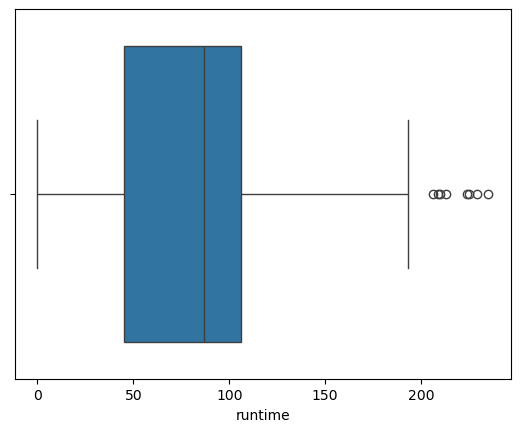

In [378]:
sns.boxplot(x=df['runtime'])
plt.show()

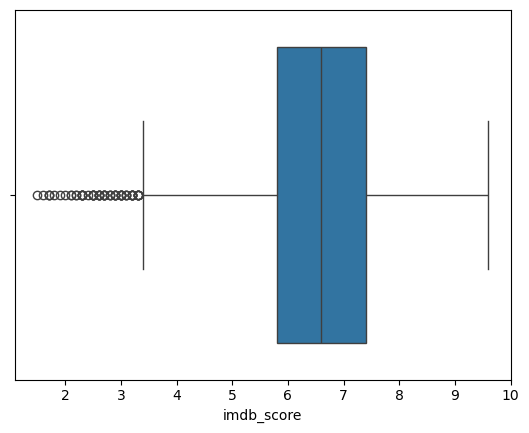

In [379]:
sns.boxplot(x=df['imdb_score'])
plt.show()

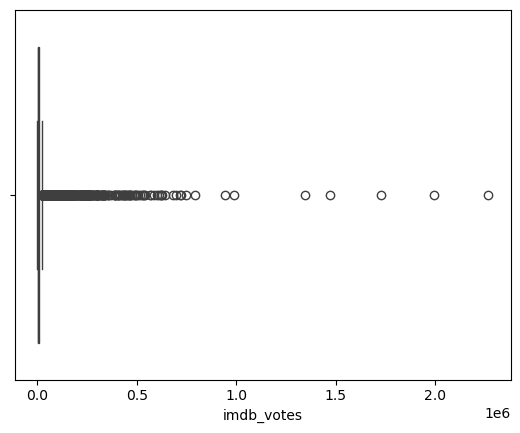

In [380]:
sns.boxplot(x=df['imdb_votes'])
plt.show()

In [381]:
df[df['runtime'] == 0]

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
450,450,ts74931,Kung Fu Panda Awesome Secrets,SHOW,"In this pair of adventures, Po tells the story...",2008,NaN,0,tt6963796,7.2,55.0
455,455,ts98252,Dreamworks Happy Holidays from Madagascar,SHOW,Madagascar goes wild with holiday spirit in th...,2005,TV-PG,0,tt6929194,6.5,96.0
535,535,ts67595,Pedro El Escamoso,SHOW,Pedro el escamoso is a popular telenovela film...,2001,TV-14,0,tt0283770,7.5,303.0
840,840,ts99814,Masameer,SHOW,A popular Saudi animation show talks sarcastic...,2011,TV-MA,0,tt6298258,8.2,677.0
2503,2503,ts74765,Daughters of Destiny,SHOW,Five girls from India's most impoverished fami...,2017,NaN,0,tt1877895,8.6,900.0
2996,2996,ts250172,Afronta!,SHOW,Afronta invites contemporary black artists and...,2017,TV-PG,0,tt12467250,7.4,8.0
3528,3528,ts268592,Beyblade Burst Rise,SHOW,"Beyblade Burst Rise, also known as Beyblade Bu...",2019,NaN,0,tt11916718,5.7,156.0
3733,3733,ts217719,Basketball or Nothing,SHOW,the lives of the Chinle High School boys' bask...,2019,TV-PG,0,tt10698408,7.4,614.0
3743,3743,ts255418,Bad Boy Billionaires: India,SHOW,This investigative docuseries explores the gre...,2020,TV-14,0,tt12923630,7.9,3010.0
3757,3757,ts237071,The Forest of Love: Deep Cut,SHOW,Nothing's as it seems when a charismatic conma...,2020,TV-MA,0,tt12079236,6.8,426.0


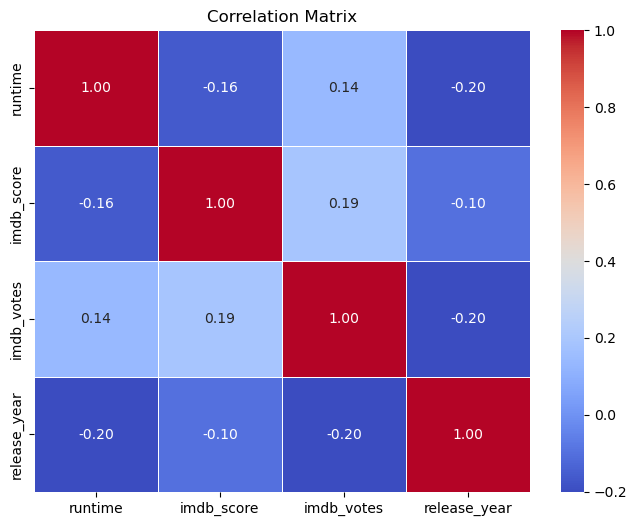

In [382]:
# Menghitung korelasi antar variabel numerik
corr_matrix = df[["runtime", "imdb_score", "imdb_votes", "release_year"]].corr()

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Menampilkan plot
plt.title("Correlation Matrix")
plt.show()

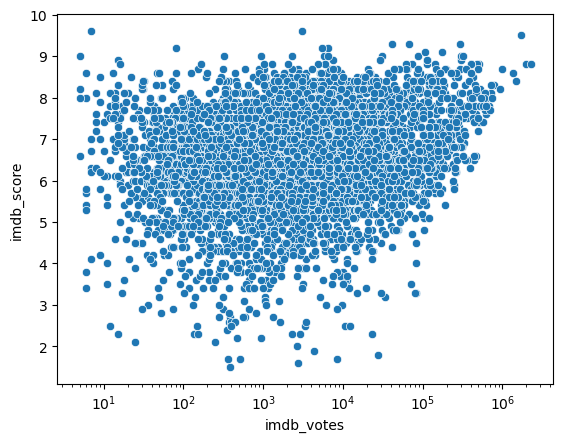

In [383]:
# Korelasi IMDb Score vs IMDb Votes
sns.scatterplot(x=df['imdb_votes'], y=df['imdb_score'])
plt.xscale("log")  # Skala log untuk melihat pola lebih jelas
plt.show()

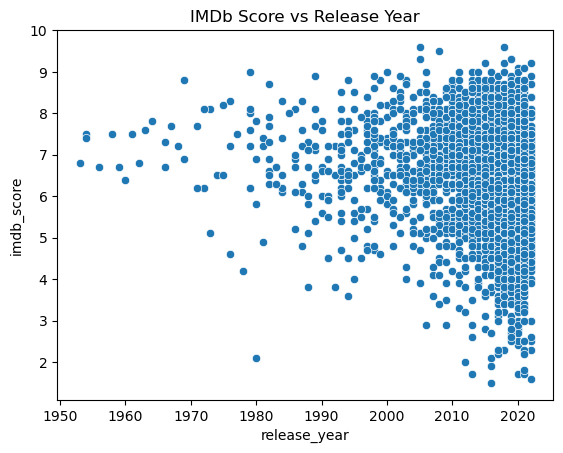

In [384]:
sns.scatterplot(x=df['release_year'], y=df['imdb_score'])
plt.title("IMDb Score vs Release Year")
plt.show()


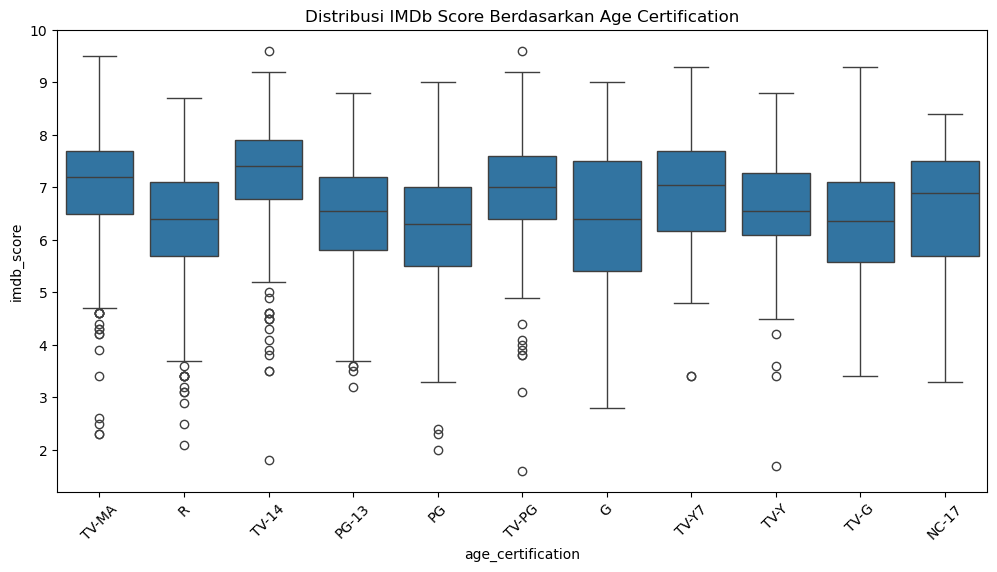

In [385]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['age_certification'], y=df['imdb_score'], order=df['age_certification'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribusi IMDb Score Berdasarkan Age Certification")
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [386]:
df['description'].fillna("No description available", inplace=True)
df['age_certification'].fillna("Unknown", inplace=True)
df['imdb_votes'].fillna(df['imdb_votes'].median(), inplace=True)

C:\Users\arlia\AppData\Local\Temp\ipykernel_14652\3485629615.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['description'].fillna("No description available", inplace=True)
C:\Users\arlia\AppData\Local\Temp\ipykernel_14652\3485629615.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [387]:
print(f"Jumlah duplikat: {df.duplicated().sum()}")

Jumlah duplikat: 0


In [388]:
scaler = MinMaxScaler()
df[['runtime', 'imdb_score', 'imdb_votes']] = scaler.fit_transform(df[['runtime', 'imdb_score', 'imdb_votes']])

In [389]:
Q1 = df['runtime'].quantile(0.25)
Q3 = df['runtime'].quantile(0.75)
IQR = Q3 - Q1

# Menghapus data yang di luar batas bawah & atas
df = df[(df['runtime'] >= (Q1 - 1.5 * IQR)) & (df['runtime'] <= (Q3 + 1.5 * IQR))]


In [390]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [391]:
df = pd.get_dummies(df, columns=['age_certification'])

In [392]:
bins = [0, 5, 7, 10]  # Batasan skor IMDb
labels = ['Low', 'Medium', 'High']

df['imdb_category'] = pd.cut(df['imdb_score'] * 10, bins=bins, labels=labels)  # *10 untuk mengembalikan skala IMDb asli


In [393]:
df['runtime'] = df['runtime'].replace(0, df['runtime'].median())

In [394]:
df['imdb_category'].fillna(df['imdb_category'].mode()[0], inplace=True)


C:\Users\arlia\AppData\Local\Temp\ipykernel_14652\466970280.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['imdb_category'].fillna(df['imdb_category'].mode()[0], inplace=True)


In [395]:
def encode_age_certification(row):
    if row['age_certification_G'] or row['age_certification_TV-Y'] or row['age_certification_TV-G']:
        return 1
    elif row['age_certification_PG'] or row['age_certification_TV-PG']:
        return 2
    elif row['age_certification_PG-13'] or row['age_certification_TV-14']:
        return 3
    elif row['age_certification_R'] or row['age_certification_TV-MA']:
        return 4
    elif row['age_certification_NC-17']:
        return 5
    else:
        return 0  # Unknown

df['age_certification'] = df.apply(encode_age_certification, axis=1)


In [396]:
df.drop(columns=[col for col in df.columns if 'age_certification_' in col], inplace=True)


In [397]:
label_encoder = LabelEncoder()
df['imdb_category_encoded'] = label_encoder.fit_transform(df['imdb_category'])
df.drop(columns=['imdb_category'], inplace=True)  # Hapus yang asli

In [398]:
scaler = MinMaxScaler()
numerical_features = ['release_year', 'runtime', 'imdb_score', 'imdb_votes']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [399]:
# Fungsi untuk menghapus outlier menggunakan IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data dalam rentang batas bawah dan atas
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Terapkan pada runtime dan imdb_votes
df = remove_outliers(df, 'runtime')
df = remove_outliers(df, 'imdb_votes')

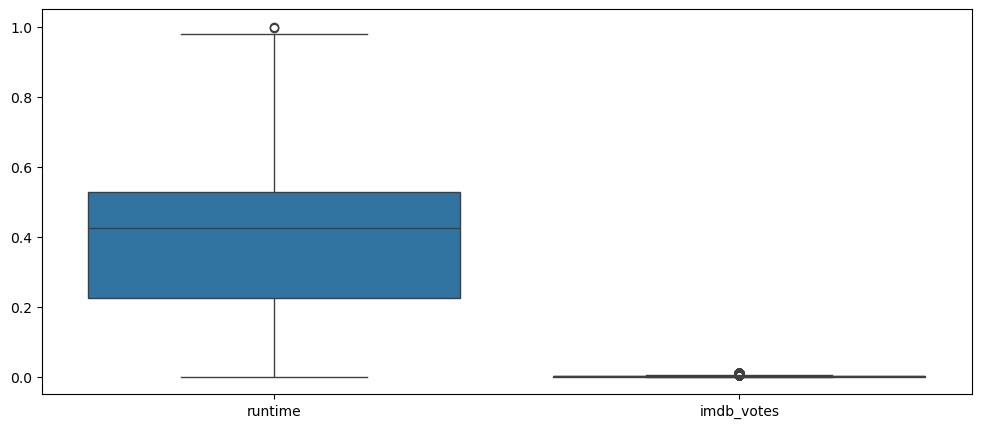

In [400]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[['runtime', 'imdb_votes']])
plt.show()

In [401]:
print(df.dtypes)

index                      int64
id                        object
title                     object
type                       int64
description               object
release_year             float64
runtime                  float64
imdb_id                   object
imdb_score               float64
imdb_votes               float64
age_certification          int64
imdb_category_encoded      int64
dtype: object


In [402]:
df.head()

,index,id,title,type,description,release_year,runtime,imdb_id,imdb_score,imdb_votes,age_certification,imdb_category_encoded
9,9,tm67378,The Professionals,0,An arrogant Texas millionaire hires four adven...,0.188406,0.602094,tt0060862,0.716049,0.007126,3,0
12,12,tm69997,Richard Pryor: Live in Concert,0,"Richard Pryor delivers monologues on race, sex...",0.376812,0.397906,tt0079807,0.814815,0.002264,4,0
13,13,tm96649,The Long Riders,0,"The origins, exploits and the ultimate fate of...",0.391304,0.507853,tt0081071,0.666667,0.004992,4,2
15,15,tm135083,Cairo Station,0,"Qinawi, a physically challenged peddler who ma...",0.072464,0.392670,tt0051390,0.740741,0.001931,0,0
16,16,tm14491,The Queen,0,"In 1967, New York City is host to the Miss All...",0.217391,0.345550,tt0183686,0.703704,0.000490,0,0


In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4471 entries, 9 to 5282
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  4471 non-null   int64  
 1   id                     4471 non-null   object 
 2   title                  4471 non-null   object 
 3   type                   4471 non-null   int64  
 4   description            4471 non-null   object 
 5   release_year           4471 non-null   float64
 6   runtime                4471 non-null   float64
 7   imdb_id                4471 non-null   object 
 8   imdb_score             4471 non-null   float64
 9   imdb_votes             4471 non-null   float64
 10  age_certification      4471 non-null   int64  
 11  imdb_category_encoded  4471 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 454.1+ KB


In [404]:
df.describe()

,index,type,release_year,runtime,imdb_score,imdb_votes,age_certification,imdb_category_encoded
count,4471.000000,4471.000000,4471.000000,4471.000000,4471.000000,4471.000000,4471.000000,4471.000000
mean,2824.541266,0.369940,0.920797,0.390822,0.610635,0.001626,1.487139,1.205771
std,1477.969162,0.482842,0.097097,0.198430,0.143025,0.002264,1.691868,0.867341
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1575.500000,0.000000,0.913043,0.225131,0.518519,0.000166,0.000000,0.000000
50%,2832.000000,0.000000,0.942029,0.424084,0.629630,0.000666,0.000000,2.000000
75%,4090.500000,1.000000,0.971014,0.528796,0.716049,0.001999,3.000000,2.000000
max,5282.000000,1.000000,1.000000,1.000000,1.000000,0.010681,5.000000,2.000000


In [405]:
features_for_clustering = ['release_year', 'runtime', 'imdb_score', 'imdb_votes', 'type', 'age_certification', 'imdb_category_encoded']

df_final = df[features_for_clustering]

# Cek hasil akhir
print(df_final.head())


    release_year   runtime  imdb_score  imdb_votes  type  age_certification  \
9       0.188406  0.602094    0.716049    0.007126     0                  3   
12      0.376812  0.397906    0.814815    0.002264     0                  4   
13      0.391304  0.507853    0.666667    0.004992     0                  4   
15      0.072464  0.392670    0.740741    0.001931     0                  0   
16      0.217391  0.345550    0.703704    0.000490     0                  0   

    imdb_category_encoded  
9                       0  
12                      0  
13                      2  
15                      0  
16                      0  


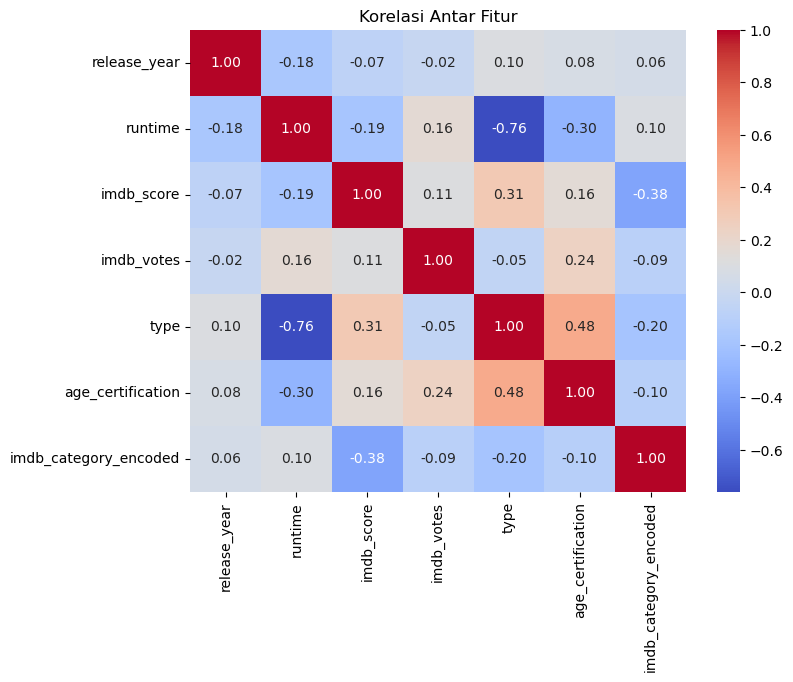

In [406]:
plt.figure(figsize=(8,6))
sns.heatmap(df_final.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Antar Fitur")
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [407]:
# Tentukan jumlah cluster (misalnya 3)
k = 3  
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

# Fit model ke data
df_final['cluster'] = kmeans.fit_predict(df_final)

# Cek hasil clustering
print(df_final.head())

    release_year   runtime  imdb_score  imdb_votes  type  age_certification  \
9       0.188406  0.602094    0.716049    0.007126     0                  3   
12      0.376812  0.397906    0.814815    0.002264     0                  4   
13      0.391304  0.507853    0.666667    0.004992     0                  4   
15      0.072464  0.392670    0.740741    0.001931     0                  0   
16      0.217391  0.345550    0.703704    0.000490     0                  0   

    imdb_category_encoded  cluster  
9                       0        1  
12                      0        1  
13                      2        1  
15                      0        0  
16                      0        0  


C:\Users\arlia\AppData\Local\Temp\ipykernel_14652\1671476131.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['cluster'] = kmeans.fit_predict(df_final)


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [408]:
# Menghitung silhouette
score = silhouette_score(df_final.drop(columns=['cluster']), df_final['cluster'])
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.5115


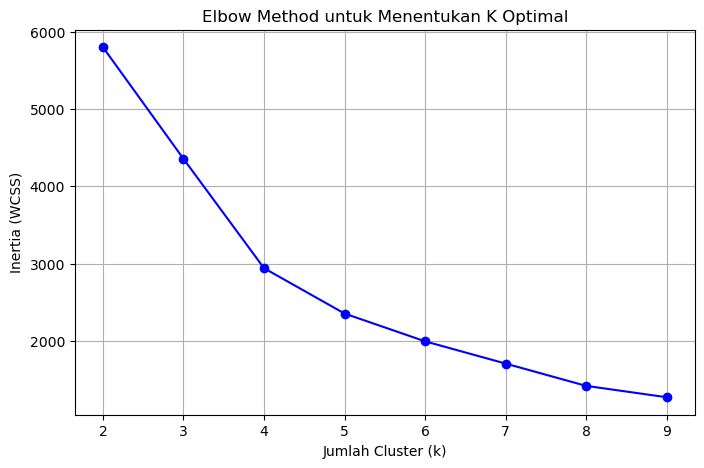

In [409]:
# Coba berbagai jumlah cluster (k)
wcss = []  # Within-Cluster Sum of Squares
k_values = range(2, 10)  # K dari 2 hingga 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_final.drop(columns=['cluster']))  # Gunakan data tanpa kolom 'cluster'
    wcss.append(kmeans.inertia_)  # Simpan inertia untuk setiap k

# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method untuk Menentukan K Optimal")
plt.xticks(k_values)
plt.grid()
plt.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [410]:
# Pisahkan fitur dan label cluster
X = df_final.drop(columns=['cluster'])  
y = df_final['cluster']  

# Latih model RandomForest untuk melihat fitur terpenting
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Buat DataFrame untuk menampilkan skor pentingnya fitur
feature_importance = pd.DataFrame({'Fitur': X.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Tampilkan fitur yang paling berpengaruh
print(feature_importance)

                   Fitur  Importance
5      age_certification    0.543535
6  imdb_category_encoded    0.235572
2             imdb_score    0.109702
4                   type    0.050494
1                runtime    0.029239
3             imdb_votes    0.024074
0           release_year    0.007385


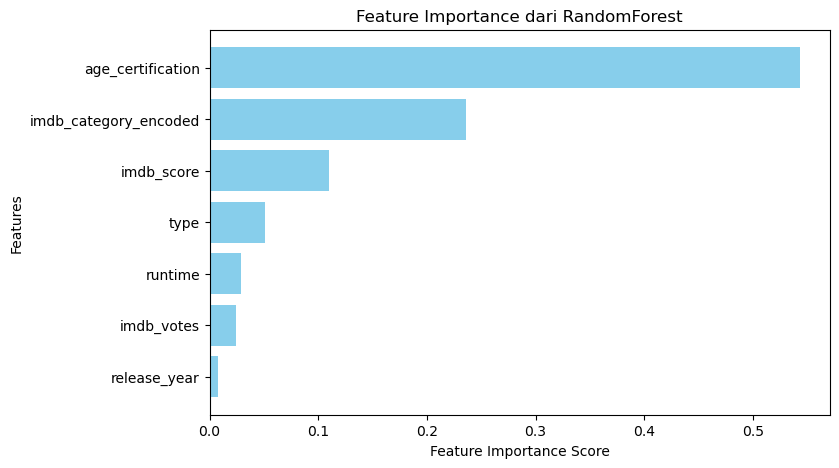

In [411]:
# Visualisasi
plt.figure(figsize=(8,5))
plt.barh(feature_importance['Fitur'], feature_importance['Importance'], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance dari RandomForest")
plt.gca().invert_yaxis()  # Supaya fitur penting ada di atas
plt.show()

In [412]:
# Pilih fitur penting
selected_features_last = ['age_certification', 'imdb_category_encoded']

# Buat dataset baru
df_selected = df_final[selected_features_last]

In [413]:
# Gunakan K yang sudah didapat dari Elbow Method
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)

# Fit dan prediksi ulang
df_selected['cluster'] = kmeans.fit_predict(df_selected)


C:\Users\arlia\AppData\Local\Temp\ipykernel_14652\1955216194.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['cluster'] = kmeans.fit_predict(df_selected)


In [414]:
# Evaluasi ulang dengan Silhouette Score
score = silhouette_score(df_selected.drop(columns=['cluster']), df_selected['cluster'])
print(f"Silhouette Score setelah feature selection: {score:.4f}")

Silhouette Score setelah feature selection: 0.6372


In [415]:
best_k = None
best_score = 0

for k in range(2, 10):  # Coba k dari 2 sampai 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_selected)
    score = silhouette_score(df_selected, labels)
    
    print(f"Silhouette Score untuk k={k}: {score:.4f}")
    
    if score > best_score:
        best_score = score
        best_k = k

print(f"\nK optimal berdasarkan Silhouette Score: {best_k} dengan skor {best_score:.4f}")

Silhouette Score untuk k=2: 0.6560
Silhouette Score untuk k=3: 0.6920
Silhouette Score untuk k=4: 0.6676
Silhouette Score untuk k=5: 0.7048
Silhouette Score untuk k=6: 0.7501
Silhouette Score untuk k=7: 0.7786
Silhouette Score untuk k=8: 0.8089
Silhouette Score untuk k=9: 0.8415

K optimal berdasarkan Silhouette Score: 9 dengan skor 0.8415


In [416]:
# Gunakan K yang sudah didapat dari Elbow Method
k_optimal = 6
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)

# Fit dan prediksi ulang
df_selected['cluster'] = kmeans.fit_predict(df_selected)

C:\Users\arlia\AppData\Local\Temp\ipykernel_14652\687990508.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['cluster'] = kmeans.fit_predict(df_selected)


In [417]:
# Evaluasi ulang dengan Silhouette Score
score = silhouette_score(df_selected.drop(columns=['cluster']), df_selected['cluster'])
print(f"Silhouette Score setelah feature selection: {score:.4f}")

Silhouette Score setelah feature selection: 0.7382


In [424]:
df_selected['cluster'].value_counts()


cluster
3    1334
2     701
4     621
5     615
1     606
0     594
Name: count, dtype: int64

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

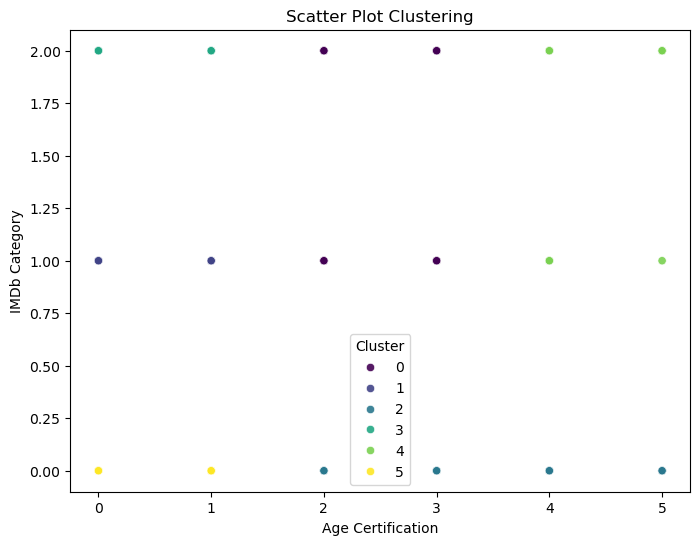

In [427]:
# Reduksi dimensi ke 2D
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_selected['age_certification'], 
                y=df_selected['imdb_category_encoded'], 
                hue=df_selected['cluster'], 
                palette='viridis', alpha=0.9)

plt.xlabel("Age Certification")
plt.ylabel("IMDb Category")
plt.title("Scatter Plot Clustering")
plt.legend(title="Cluster")
plt.show()

In [428]:
df_selected["cluster"].value_counts(normalize=True)


cluster
3    0.298367
2    0.156788
4    0.138895
5    0.137553
1    0.135540
0    0.132856
Name: proportion, dtype: float64

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [429]:
df_selected['imdb_category'] = label_encoder.inverse_transform(df_selected['imdb_category_encoded'])

C:\Users\arlia\AppData\Local\Temp\ipykernel_14652\3409239370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['imdb_category'] = label_encoder.inverse_transform(df_selected['imdb_category_encoded'])


In [430]:
# Mapping nilai encoded ke kategori asli
imdb_category_mapping = {0: 'Low', 1: 'Medium', 2: 'High'}
df_selected['imdb_category'] = df_selected['imdb_category_encoded'].map(imdb_category_mapping)

C:\Users\arlia\AppData\Local\Temp\ipykernel_14652\2841739536.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['imdb_category'] = df_selected['imdb_category_encoded'].map(imdb_category_mapping)


In [431]:
age_cert_mapping = {
    1: ['G', 'TV-Y', 'TV-G'],
    2: ['PG', 'TV-PG'],
    3: ['PG-13', 'TV-14'],
    4: ['R', 'TV-MA'],
    5: ['NC-17'],
    0: ['Unrated/Unknown']  # Untuk nilai 0 yang tidak masuk dalam kategori
}

df_selected['age_certification'] = df_selected['age_certification'].map(lambda x: age_cert_mapping.get(x, 'Unknown'))


C:\Users\arlia\AppData\Local\Temp\ipykernel_14652\1846087946.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['age_certification'] = df_selected['age_certification'].map(lambda x: age_cert_mapping.get(x, 'Unknown'))


In [186]:
# Lakukan agregasi
agg_results = df_selected.groupby("cluster").agg({
    "age_certification": lambda x: x.mode().iloc[0],  # Modus untuk data kategorikal
    "imdb_category_encoded": lambda x: x.mode().iloc[0],  # Modus untuk data kategorikal
    "imdb_score": ["min", "max", "mean"]  # min, max, mean untuk data numerik
})

# Ubah nama kolom agar lebih mudah dibaca
agg_results.columns = ['age_certification_mode', 'imdb_category_mode', 'imdb_score_min', 'imdb_score_max', 'imdb_score_mean']

# Tampilkan hasil
print(agg_results.to_string())

        age_certification_mode  imdb_category_mode  imdb_score_min  imdb_score_max  imdb_score_mean
cluster                                                                                            
0                  [PG, TV-PG]                   2        0.012346        0.691358         0.543623
1            [Unrated/Unknown]                   1        0.024691        0.493827         0.395510
2               [PG-13, TV-14]                   0        0.703704        1.000000         0.771075
3                   [R, TV-MA]                   2        0.074074        0.691358         0.563689
4            [Unrated/Unknown]                   2        0.000000        0.691358         0.602532
5            [Unrated/Unknown]                   0        0.703704        0.925926         0.759872
6                   [R, TV-MA]                   0        0.703704        0.925926         0.767429


Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.